<a href="https://colab.research.google.com/github/Yahred/evolutionary-computation/blob/main/CGAOptimizationProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolución de un problema de optimización a través de un algoritmo genético

**Enunciado del problema**

La	siguiente	gráfica	corresponde	al	distribución	de	una	carpintería	local	que	se
encarga	el	proceso	de	elaboración	de	una	silla.

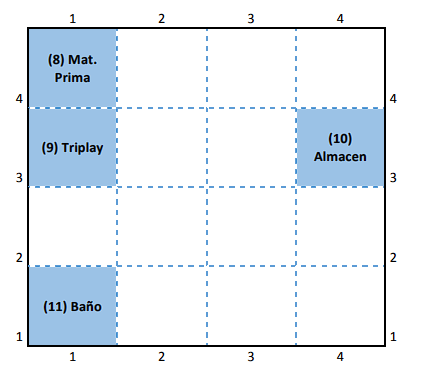

El	problema	es	que	la	carpintería	no	sabe	donde	ubicar	las	distintas	maquinas	de
trabajo	en	el	espacio	descrito.	La	maquinaria	para	realizar	el	proceso	de
elaboración	de	la	silla	es	el	siguiente

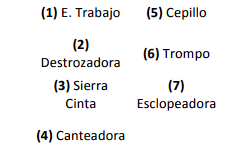

Cada	maquinaria	puede	ser	ubicada	en	los	espacios	de	2	x	2	y	en	los	espacios	en
blanco	descritos	en	la	grafica	anterior.		Los	espacios	descritos	en	color	azul	son
espacios	fijos	y	no	pueden	moverse	de	su	lugar

Y	el	recorrido	para	realizar	la	tarea	es	el	siguiente:

* 1 al 8
* 8 al 1
* 1 al 4
* 4 al 5
* 5 al 3
* 3 al 4
* 4 al 3
* 3 al 1
* 1 al 9
* 9 al 1
* 1 al 3
* 3 al 1
* 1 al 10

Encuentra	la	configuración	de	la	carpintería	que	minimice	el	recorrido	del
personal

# Setup del notebook

Bloque de código para importar los módulos necesarios

In [2]:
 pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.5 MB/s eta 0:00:00


In [3]:
from deap import base, creator, tools, algorithms

import numpy as np
import matplotlib.pyplot as plt

import math
import random

# Configuración de la evolución

A continuación se define la función de aptitud



In [18]:
class Estacion:
  def __init__(self, id: int, nombre: str, x: int, y: int) -> None:
    self.id = id
    self.nombre = nombre
    self.x = x
    self.y = y

  def __str__(self) -> str:
    return '{} x: {}, y: {}'.format(self.nombre, self.x, self.y)

estaciones_nombres = {
   1: 'E. Trabajo',
   2: 'Destrozadora',
   3: 'Sierra cinta',
   4: 'Canteadora',
   5: 'Cepillo',
   6: 'Trompo',
   7: 'Esclopeadora',
}

estaciones_iniciales = {
    8: Estacion(8, 'Mat.Prima', 1, 4),
    9: Estacion(9, 'Triplay', 1, 3),
    10: Estacion(10, 'Almacen', 4, 3),
    11: Estacion(11, 'Baño', 1, 1),
}

posiciones_ocupadas = {
    '1,1': True,
    '1,3': True,
    '1,4': True,
    '4,3': True,
}

fenotipo = {
    0: (1, 2),
    1: (2, 1),
    2: (2, 2),
    3: (2, 3),
    4: (2, 4),
    5: (3, 1),
    6: (3, 2),
    7: (3, 3),
    8: (3, 4),
    9: (4, 1),
    10: (4, 2),
    11: (4, 2),
}

genes = 7

ruta = [1, 8, 1, 4, 5, 3, 4, 3, 1, 9, 1, 3, 1, 10]

In [5]:
def calcular_distancia(a: Estacion, b: Estacion) -> int:
  return math.sqrt(math.pow(b.x - a.x, 2) + math.pow(b.y - a.y, 2))

In [22]:
def ind_to_estaciones(ind: list[int]) -> list[Estacion]:
  posiciones = [fenotipo[gen] for gen in ind]
  estaciones = estaciones_iniciales.copy()
  for i in range(len(posiciones)):
    x, y = posiciones[i]
    estacion = Estacion(i + 1, estaciones_nombres[i + 1], x, y)
    estaciones[i + 1] = estacion

  return estaciones


def fitness(ind: list[int]):
  estaciones = ind_to_estaciones(ind)
  acc = 0
  for i in range(1, len(ruta)):
    a = ruta[i - 1]
    b = ruta[i]
    estacion_a = estaciones[a]
    estacion_b = estaciones[b]
    acc += calcular_distancia(estacion_a, estacion_b)

  return acc,


# Configuración de los individuos

El individuo estará compuesto en pares de números naturales del 1 al 4 representando la posición de la estación

In [15]:
def crear_individuo():
  ind = list(range(12))
  random.shuffle(ind)
  return ind[0: genes]

In [23]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("individual", tools.initIterate, creator.Individual, crear_individuo)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [24]:
ind = toolbox.individual()
ind

[5, 0, 10, 9, 2, 11, 8]

# Evolución

In [25]:
random.seed(64)

pop = toolbox.population(n=500)
hof = tools.HallOfFame(1)
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0, ngen=40, halloffame=hof, verbose=True, stats=stats)

ganador = tools.selBest(pop, k=1)[0]

gen	nevals	avg    
0  	500   	26.3414
1  	260   	22.7812
2  	266   	20.4356
3  	256   	18.4859
4  	234   	16.6506
5  	270   	14.9966
6  	272   	13.302 
7  	256   	11.536 
8  	246   	9.91466
9  	274   	8.64307
10 	242   	7.3934 
11 	272   	6.82843
12 	238   	6.82843
13 	284   	6.82843
14 	240   	6.82843
15 	264   	6.82843
16 	268   	6.82843
17 	238   	6.82843
18 	254   	6.82843
19 	256   	6.82843
20 	252   	6.82843
21 	248   	6.82843
22 	246   	6.82843
23 	246   	6.82843
24 	260   	6.82843
25 	266   	6.82843
26 	266   	6.82843
27 	248   	6.82843
28 	254   	6.82843
29 	254   	6.82843
30 	274   	6.82843
31 	240   	6.82843
32 	260   	6.82843
33 	244   	6.82843
34 	226   	6.82843
35 	258   	6.82843
36 	240   	6.82843
37 	274   	6.82843
38 	232   	6.82843
39 	244   	6.82843
40 	244   	6.82843


In [11]:
ganador

[2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 1, 2, 4]

# Resultados

A continuación se desplega una gráfica del acomodo optimo según el individuo ganador

Mat.Prima x: 1, y: 4
Triplay x: 1, y: 3
Almacen x: 4, y: 3
Baño x: 1, y: 1
E. Trabajo x: 2, y: 3
Destrozadora x: 4, y: 1
Sierra cinta x: 2, y: 3
Canteadora x: 2, y: 3
Cepillo x: 2, y: 3
Trompo x: 4, y: 1
Esclopeadora x: 3, y: 2


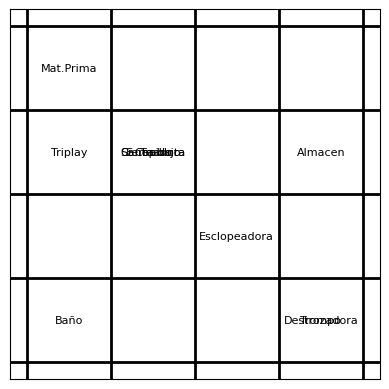

In [38]:
fig, ax = plt.subplots()
for i in range(5):
    ax.axhline(y=i, color='k', linewidth=2)
    ax.axvline(x=i, color='k', linewidth=2)

ax.set_xticks([])
ax.set_yticks([])

ax.set_aspect('equal')

estaciones = ind_to_estaciones(ganador)
padding = 0.5
for estacion in estaciones.values():
  print(estacion)
  ax.text(estacion.x - 1 + padding, estacion.y - 1 + padding, estacion.nombre, ha='center', va='center', fontsize=8)

plt.show()